# A1: Data Cleaning and Consistency Checks on: listings_details.csv

Contents.

Dataframe: 'listings'
- 1. Viewing the dataframe
- 2. Some basic stats and counts
    - 2.a Outlier check: price
    - 2.b Outlier check minimum nights 
    - 2.c geo-analysis prep: checking the neighbourhood variables
- 3. Removing unnecessary columns >> 'listings' => 'listings_reduced'

Dataframe: 'listings_reduced'
- 4. Missing Data Check
- 5. Duplicate Check
- 6. Mixed-type Data Check
- 7. Summary of changes to the original dataframe >> 'listings reduced' => 'listings_cleaned' => 'listings_cleaned2'

Dataframe: 'listings_cleaned2'
- 8. Deriving new column: country of the host >> 'listings_cleaned2 => 'listings_country'

Exporting the cleaned dataframe

## Importing libraries and data

In [91]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

In [92]:
#importing csv dataset:
path = r'C:\Users\chris\Documents\airbnb_Berlin'
listings = pd.read_csv(os.path.join(path,'02 data', 'original data', 'listings_details.csv'))

## 1) Viewing the dataframe

In [93]:
# activating all columns to be seen:
pd.set_option('display.max_columns', 100)

In [94]:
# activating all rows to be seen:
pd.set_option('display.max_rows', None)

In [95]:
# size:
listings.shape

(12472, 75)

In [96]:
# columns:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [97]:
listings['neighbourhood_cleansed'].value_counts(dropna=False)

Alexanderplatz                               826
Frankfurter Allee Süd FK                     654
Tempelhofer Vorstadt                         611
Brunnenstr. Süd                              503
Reuterstraße                                 444
Prenzlauer Berg Südwest                      348
Neuköllner Mitte/Zentrum                     334
südliche Luisenstadt                         325
Schöneberg-Nord                              324
Rixdorf                                      304
Prenzlauer Berg Nordwest                     297
Frankfurter Allee Nord                       293
Prenzlauer Berg Süd                          284
Schillerpromenade                            265
Moabit West                                  263
Schöneberg-Süd                               240
nördliche Luisenstadt                        233
Helmholtzplatz                               231
Karl-Marx-Allee-Süd                          223
Moabit Ost                                   214
Prenzlauer Berg Nord

In [98]:
# data types:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [99]:
# looks:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20230622195229,2023-06-23,previous scrape,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a day,100%,27%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone']",t,t,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Hair dryer"", ""Hangers"", ""Kitchen"", ""Carbon m...",$83.00,63,184,63,63,184,184,63.0,184.0,NaN,t,0,29,42,80,2023-06-23,148,1,1,2009-06-20,2023-05-25,4.63,4.67,4.52,4.64,4.69,4.92,4.62,First name and Last name: Nicolas Krotz Conta...,f,1,1,0,0,0.87
1,9991,https://www.airbnb.com/rooms/9991,20230622195229,2023-06-23,city scrape,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,NaN,NaN,0%,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,Prenzlauer Berg,1.0,1.0,"['email', 'phone']",t,t,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,NaN,2.5 baths,4.0,7.0,"[""Wifi"", ""Babysitter recommendations"", ""Smoke ...",$180.00,6,14,6,6,14,14,6.0,14.0,NaN,t,0,0,0,52,2023-06-23,8,0,0,2015-08-09,2020-01-04,5.00,5.00,5.00,5.00,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.08
2,14325,https://www.airbnb.com/rooms/14325,20230622195229,2023-06-23,city scrape,Rental unit in Berlin · ★4.67 · Studio · 1 bed...,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany","From Berlin, Germany. We love to travel!",within a day,100%,19%,f,https://a0.muscache.com/im/users/55531/profile...,https://a0.muscache.com/im/users/55531/profile...,Prenzlauer Berg,4.0,5.0,"['email', 'phone', 'work_email']",t,t,NaN,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Hangers"", ""Kitchen"", ""Wifi"", ""TV"", ""Dishes a...",$70.00,93,1125,93,93,1125,1125,93.0,1125.0,NaN,t,0,12,12,215,2023-06-23

## 2) Some basic stats and counts

In [100]:
# basic stats:
listings.describe().round(1)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.247200e+04,1.247200e+04,12472.0,12462.0,12462.0,12472.0,12472.0,12472.0,0.0,7933.0,12309.0,12472.0,12472.0,12472.0,12472.0,1.247200e+04,1.247200e+04,12472.0,1.247200e+04,0.0,12472.0,12472.0,12472.0,12472.0,12472.0,12472.0,12472.0,10101.0,9992.0,9994.0,9989.0,9993.0,9989.0,9986.0,12472.0,12472.0,12472.0,12472.0,10101.0
mean,1.843407e+17,2.023062e+13,132432837.8,12.9,14.4,52.5,13.4,3.0,NaN,1.5,1.9,44.7,667.7,44.5,49.4,5.173163e+05,1.033886e+06,48.6,1.032713e+06,NaN,5.1,13.2,22.6,117.2,36.6,9.6,0.8,4.7,4.8,4.7,4.8,4.8,4.8,4.6,7.1,6.0,0.8,0.2,1.1
std,3.265646e+17,2.500000e+00,154357754.3,63.6,67.3,0.0,0.1,1.9,NaN,0.8,1.5,54.8,497.1,55.7,66.0,3.330331e+07,4.709233e+07,65.4,4.703909e+07,NaN,8.6,18.8,29.5,131.4,78.6,21.4,1.8,0.6,0.4,0.5,0.4,0.4,0.4,0.4,22.4,22.2,3.0,2.5,1.9
min,3.176000e+03,2.023062e+13,1581.0,1.0,1.0,52.4,13.1,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,1.518332e+07,2.023062e+13,12746788.8,1.0,1.0,52.5,13.4,2.0,NaN,1.0,1.0,2.0,140.0,2.0,3.0,3.650000e+02,3.650000e+02,2.1,3.650000e+02,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.6,4.7,4.5,4.8,4.8,4.7,4.5,1.0,0.0,0.0,0.0,0.1
50%,3.434609e+07,2.023062e+13,52747435.0,1.0,2.0,52.5,13.4,2.0,NaN,1.0,1.0,7.0,1124.0,6.0,10.0,1.125000e+03,1.125000e+03,7.0,1.125000e+03,NaN,0.0,2.0,6.0,52.0,7.0,1.0,0.0,4.8,4.9,4.8,4.9,4.9,4.8,4.7,1.0,1.0,0.0,0.0,0.5
75%,5.415847e+07,2.023062e+13,216541841.2,4.0,5.0,52.5,13.4,4.0,NaN,2.0,2.0,92.0,1125.0,92.0,92.0,1.125000e+03,1.125000e+03,92.0,1.125000e+03,NaN,6.0,21.0,41.0,243.0,33.0,10.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,4.9,3.0,2.0,1.0,0.0,1.5
max,9.188887e+17,2.023062e+13,521178523.0,1126.0,1359.0,52.7,13.7,16.0,NaN,12.0,29.0,1100.0,9999.0,1100.0,1100.0,2.147484e+09,2.147484e+09,1100.0,2.147484e+09,NaN,30.0,60.0,90.0,365.0,2074.0,764.0,42.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,172.0,172.0,42.0,38.0,65.3


### >>>>>>>>> ok the price 9999.0  OR 0 looks sus. Minimum nights 1100.0 as well. 

In [101]:
listings['price'].dtype

dtype('O')

In [102]:
listings['price'].head(20)

0      $83.00
1     $180.00
2      $70.00
3      $92.00
4      $25.00
5     $179.00
6      $70.00
7      $53.00
8     $170.00
9      $65.00
10    $280.00
11     $70.00
12    $100.00
13    $120.00
14     $62.00
15     $80.00
16     $66.00
17     $19.00
18     $43.00
19    $189.00
Name: price, dtype: object

#### other than in lisings.csv, 'price' here is an object and not a float. To run the stats, this will be fixed.

In [103]:
# In case not all values are strings, telling pandas to make them strings.
listings['price'] = listings['price'].astype(str)

In [104]:
# Now remove the currency symbol and thousands separator, converting into floats:
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\chris\AppData\Local\Temp\ipykernel_2760\262188285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [105]:
# calling statistics to check
price_stats = listings['price'].describe().round(1)
print(price_stats)

count    12472.0
mean       115.2
std        195.7
min          0.0
25%         50.0
50%         81.0
75%        140.0
max       9999.0
Name: price, dtype: float64


## 2a) Outlier check: price

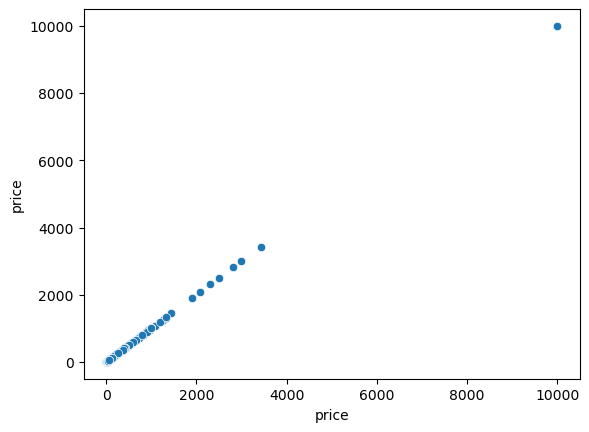

In [106]:
# create a scatterplot to check on the distribution of 'price':
scatplot1=sns.scatterplot(x = 'price', y = 'price',data = listings)

#### Scatterplot shows, that the max price is an outlier, that disturbs all statistics. Needs to be addressed.

In [107]:
# defining prices over 4000 as outliers. Creating a subset to check how many outliers there are:
subset_prices =  listings[listings['price']>4000]

In [108]:
subset_prices.shape

(3, 75)

In [109]:
subset_prices.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7452,41897771,https://www.airbnb.com/rooms/41897771,20230622195229,2023-06-23,previous scrape,Hotel in Berlin · 1 bedroom · 1 bed · 1 privat...,Im „Hotel Helle Mitte“ Berlin erwartet Sie ein...,Das Quartier Hellersdorf liegt im Zentrum von ...,https://a0.muscache.com/pictures/89877fd1-b574...,7031936,https://www.airbnb.com/users/show/7031936,Hotel,2013-06-21,"Berlin, Germany",+49 17610046453,NaN,NaN,98%,f,https://a0.muscache.com/im/pictures/user/0f356...,https://a0.muscache.com/im/pictures/user/0f356...,Hellersdorf,6.0,7.0,"['email', 'phone']",t,t,"Berlin, Germany",Hellersdorf-Nord,Marzahn - Hellersdorf,52.53664,13.60221,Room in hotel,Private room,1,NaN,1 private bath,1.0,1.0,"[""Hair dryer"", ""Hangers"", ""TV with standard ca...",9999.0,92,1125,92,92,1125,1125,92.0,1125.0,NaN,t,0,21,51,326,2023-06-23,2,0,0,2021-07-17,2021-08-16,3.0,4.5,5.0,2.5,3.0,3.0,3.5,DE 319715940,t,6,0,6,0,0.08
7465,41923918,https://www.airbnb.com/rooms/41923918,20230622195229,2023-06-23,previous scrape,Hotel in Berlin · ★4.60 · 1 bedroom · 2 beds ·...,Im „Hotel Helle Mitte“ Berlin erwartet Sie ein...,NaN,https://a0.muscache.com/pictures/b720b48c-c9f7...,7031936,https://www.airbnb.com/users/show/7031936,Hotel,2013-06-21,"Berlin, Germany",+49 17610046453,NaN,NaN,98%,f,https://a0.muscache.com/im/pictures/user/0f356...,https://a0.muscache.com/im/pictures/user/0f356...,Hellersdorf,6.0,7.0,"['email', 'phone']",t,t,NaN,Hellersdorf-Nord,Marzahn - Hellersdorf,52.53892,13.60420,Room in hotel,Private room,2,NaN,1 private bath,1.0,2.0,"[""Hair dryer"", ""Hangers"", ""TV with standard ca...",9999.0,92,1125,92,92,1125,1125,92.0,1125.0,NaN,t,0,21,51,326,2023-06-23,5,5,0,2022-07-17,2022-07-31,4.6,5.0,5.0,4.6,4.8,4.0,4.6,DE 319715940,t,6,0,6,0,0.44
7467,41924747,https://www.airbnb.com/rooms/41924747,20230622195229,2023-06-23,previous scrape,Hotel in Berlin · 2 bedrooms · 3 beds · 1 priv...,Im „Hotel Helle Mitte“ Berlin erwartet Sie ein...,Das Quartier Hellersdorf liegt im Zentrum von ...,https://a0.muscache.com/pictures/78427d9c-a455...,7031936,https://www.airbnb.com/users/show/7031936,Hotel,2013-06-21,"Berlin, Germany",+49 17610046453,NaN,NaN,98%,f,https://a0.muscache.com/im/pictures/user/0f356...,https://a0.muscache.com/im/pictures/user/0f356...,Hellersdorf,6.0,7.0,"['email', 'phone']",t,t,"Berlin, Germany",Hellersdorf-Nord,Marzahn - Hellersdorf,52.53749,13.60226,Room in hotel,Private room,4,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Hangers"", ""TV with standard ca...",9999.0,92,1125,92,92,1125,1125,92.0,1125.0,NaN,t,0,21,51,326,2023-06-23,2,1,0,2021-07-18,2022-07-23,3.0,2.5,2.5,3.0,3.0,3.0,2.5,DE 319715940,t,6,0,6,0,0.08


#### those seem to be test listings or something. Statistical distribution strongly suggests outlier, so those 3 listings will be removed from the dataframe.

In [110]:
# And now checking a subset on price = 0. People don't rent their rooms for nothing:
subset_prices2 =  listings[listings['price']==0]

In [111]:
subset_prices2

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7597,42583346,https://www.airbnb.com/rooms/42583346,20230622195229,2023-06-23,previous scrape,Hotel in Berlin · Studio,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,316070228,https://www.airbnb.com/users/show/316070228,Hotel Delta Am Potsdamer Platz,2019-12-10,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/298be...,https://a0.muscache.com/im/pictures/user/298be...,Tiergarten,5.0,5.0,"['email', 'phone']",t,t,NaN,Tiergarten Süd,Mitte,52.50120,13.36287,Room in hotel,Hotel room,4,NaN,NaN,NaN,NaN,"[""Hangers"", ""Bed sheets and pillows"", ""Free wi...",0.0,92,365,92,92,365,365,92.0,365.0,NaN,f,0,0,0,0,2023-06-23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
7753,43247575,https://www.airbnb.com/rooms/43247575,20230622195229,2023-06-23,previous scrape,Hostel in Berlin · Studio,NaN,NaN,https://a0.muscache.com/pictures/a077f8c2-4f10...,312172749,https://www.airbnb.com/users/show/312172749,Aletto Hotel Kudamm,2019-11-26,"Berlin, Germany",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/e6ba4...,https://a0.muscache.com/im/pictures/user/e6ba4...,NaN,2.0,3.0,"['email', 'phone']",t,t,NaN,Otto-Suhr-Allee,Charlottenburg-Wilm.,52.50658,13.32935,Room in hostel,Hotel room,0,NaN,NaN,NaN,NaN,"[""Free wifi"", ""Bed sheets and pillows"", ""Smoke...",0.0,92,365,92,92,365,365,92.0,365.0,NaN,f,0,0,0,0,2023-06-23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN


#### Those 2 listings I will delete and not include in my analysis as well.

## 2b) Outlier check minimum nights

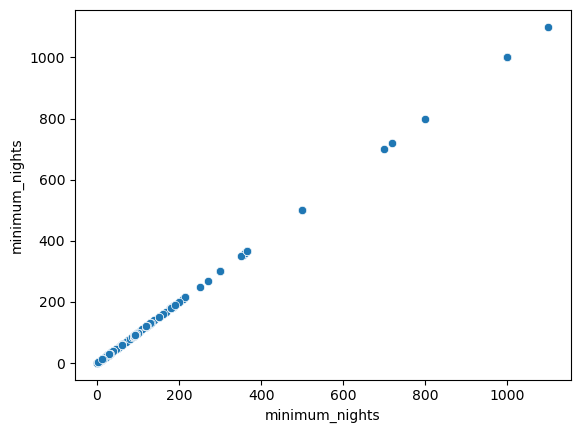

In [112]:
# create a scatterplot to check on the distribution of 'minimum_nights':
scatplot2=sns.scatterplot(x = 'minimum_nights', y = 'minimum_nights',data = listings)

Text(0.5, 1.0, 'Boxplot of minimum_nights')

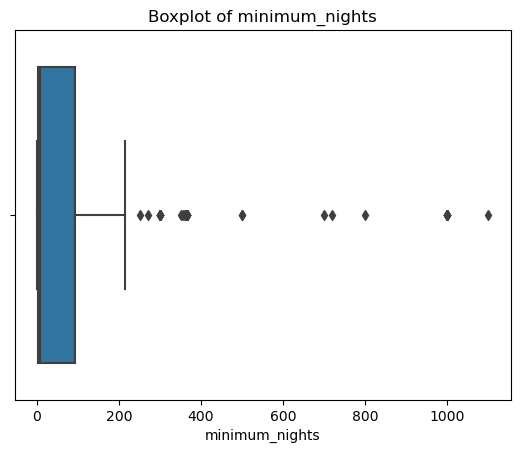

In [113]:
# Creating a box and whisker for a bit more clarity...
sns.boxplot(x=listings['minimum_nights'])
plt.xlabel('minimum_nights')
plt.title('Boxplot of minimum_nights')

In [114]:
# Calculating outliers, using IQR method:
q1 = listings['minimum_nights'].quantile(0.25)
q3 = listings['minimum_nights'].quantile(0.75)
iqr = q3 - q1

In [115]:
# Calculating outliers, using IQR method:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = listings[(listings['minimum_nights'] < lower_bound) | (listings['minimum_nights'] > upper_bound)]

In [116]:
# show outlier dataframe:
outliers.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
57,174547,https://www.airbnb.com/rooms/174547,20230622195229,2023-06-23,previous scrape,Rental unit in Berlin · ★4.71 · 2 bedrooms · 3...,<b>The space</b><br />High above the rooftops ...,NaN,https://a0.muscache.com/pictures/2819229/0d788...,833995,https://www.airbnb.com/users/show/833995,Ilona,2011-07-18,"Berlin, Germany","Ich heiße alle Gäste , die die meine aufregend...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/833995/profil...,https://a0.muscache.com/im/users/833995/profil...,Mitte,4.0,5.0,"['email', 'phone']",t,f,NaN,Alexanderplatz,Mitte,52.51107,13.41645,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,3.0,"[""Wifi"", ""Smoke alarm"", ""Refrigerator"", ""Coffe...",103.0,365,365,365,365,365,365,365.0,365.0,NaN,f,0,0,0,0,2023-06-23,31,0,0,2011-11-22,2016-10-02,4.71,4.67,4.80,4.43,4.77,4.73,4.73,NaN,f,4,4,0,0,0.22
58,174560,https://www.airbnb.com/rooms/174560,20230622195229,2023-06-23,previous scrape,Rental unit in Berlin · ★4.71 · 2 bedrooms · 3...,"<b>The space</b><br />Our bright, well maintai...",NaN,https://a0.muscache.com/pictures/2865342/0e403...,833995,https://www.airbnb.com/users/show/833995,Ilona,2011-07-18,"Berlin, Germany","Ich heiße alle Gäste , die die meine aufregend...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/833995/profil...,https://a0.muscache.com/im/users/833995/profil...,Mitte,4.0,5.0,"['email', 'phone']",t,f,NaN,Alexanderplatz,Mitte,52.51112,13.41596,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,3.0,"[""Wifi"", ""Smoke alarm"", ""Refrigerator"", ""Coffe...",78.0,365,365,365,365,365,365,365.0,365.0,NaN,f,0,0,0,0,2023-06-23,56,0,0,2012-05-24,2016-10-01,4.71,4.76,4.86,4.76,4.71,4.59,4.71,NaN,f,4,4,0,0,0.42
59,174576,https://www.airbnb.com/rooms/174576,20230622195229,2023-06-23,previous scrape,Rental unit in Berlin · ★4.66 · 2 bedrooms · 4...,Schön eingerichtete 3-Zimmerwohnung mit 2 Schl...,NaN,https://a0.muscache.com/pictures/1108358/7c6bb...,833995,https://www.airbnb.com/users/show/833995,Ilona,2011-07-18,"Berlin, Germany","Ich heiße alle Gäste , die die meine aufregend...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/833995/profil...,https://a0.muscache.com/im/users/833995/profil...,Mitte,4.0,5.0,"['email', 'phone']",t,f,NaN,Alexanderplatz,Mitte,52.51101,13.41584,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,4.0,"[""Hair dryer"", ""Hangers"", ""TV with standard ca...",103.0,365,365,365,365,365,365,365.0,365.0,NaN,f,0,0,0,0,2023-06-23,41,0,0,2012-02-09,2016-10-02,4.66,4.75,4.78,4.53,4.69,4.45,4.70,NaN,f,4,4,0,0,0.30
60,174579,https://www.airbnb.com/rooms/174579,20230622195229,2023-06-23,previous scrape,Rental unit in Berlin · ★4.66 · 2 bedrooms · 3...,Schön eingerichtete 3-Zi

In [117]:
outliers.shape

(37, 75)

In [118]:
outliers['minimum_nights'].value_counts().sort_values()

1100     1
800      1
355      1
700      1
250      1
270      1
720      1
350      1
500      2
360      2
1000     7
300      8
365     10
Name: minimum_nights, dtype: int64

#### The statistical method suggests: lowest outlier is 250 minimum nights, highest is 1100 minium nights. BUT: Outliers are not always obliging to statistical methods. Owners can chose how long they offer their property, so the concept of outliers is more to find obvious fake listings or human bias, etc. For this analysis, I only include rental offers up to 365 days minimum nights, as 1 year is the typical sabbatical period one might to sublet their room. Observations with values beyond that wil be removed from the dataframe. This approach remains a bit random, but for startes it's ok.

## 2c) geo-analysis prep: checking the neighbourhood variables

In [119]:
# 'host_neighbourhood' is the variable edited by the landlord? No description by inside airbnb. 
listings['host_neighbourhood'].value_counts(dropna=False)

NaN                               5863
Mitte                              826
Prenzlauer Berg                    821
Kreuzberg                          793
Neukölln                           760
Friedrichshain                     676
Schöneberg                         334
Wedding                            301
Charlottenburg                     260
Moabit                             243
Wilmersdorf                        151
Pankow                              74
Tempelhof                           69
Tiergarten                          68
Weißensee                           63
Rummelsburg                         62
Wilhelmstadt                        50
Alt-Treptow                         48
Westend                             47
Steglitz                            41
Zehlendorf                          34
Friedenau                           33
Lichterfelde                        32
Lichtenberg                         31
Reinickendorf                       30
Friedrichsfelde          

In [120]:
#'neighbourhood' is the variable edited by the landlord? No description by inside airbnb. 
listings['neighbourhood'].value_counts(dropna=False)

Berlin, Germany                                6579
NaN                                            5857
Berlin Charlottenburg, Berlin, Germany            3
Berlin - Mitte, Germany                           3
Berlin, Be, Germany                               3
Alt Treptow, Berlin, Germany                      1
Berlin, Spandau, Germany                          1
Schöneiche bei Berlin, Brandenburg, Germany       1
Mitte, Berlin, Germany                            1
Weissenhoher Strasse 14, Berlin, Germany          1
Berlin Prenzlauer Berg , Berlin, Germany          1
Berlin, Berlín, Germany                           1
Weissensee, Berlin, Germany                       1
Berlin, SN, Germany                               1
Hoppegarten, Brandenburg, Germany                 1
Berlin, DE, Germany                               1
Berlin , Germany                                  1
Berlin, Zehlendorf, Germany                       1
Berlín, Germany                                   1
Berlin Fried

In [121]:
#'neighbourhood_cleansed' is the variable cleansed by inside airbnb: it's the actual latitude and longitude.
listings['neighbourhood_cleansed'].value_counts(dropna=False)

Alexanderplatz                               826
Frankfurter Allee Süd FK                     654
Tempelhofer Vorstadt                         611
Brunnenstr. Süd                              503
Reuterstraße                                 444
Prenzlauer Berg Südwest                      348
Neuköllner Mitte/Zentrum                     334
südliche Luisenstadt                         325
Schöneberg-Nord                              324
Rixdorf                                      304
Prenzlauer Berg Nordwest                     297
Frankfurter Allee Nord                       293
Prenzlauer Berg Süd                          284
Schillerpromenade                            265
Moabit West                                  263
Schöneberg-Süd                               240
nördliche Luisenstadt                        233
Helmholtzplatz                               231
Karl-Marx-Allee-Süd                          223
Moabit Ost                                   214
Prenzlauer Berg Nord

In [122]:
# should be no missing values here
listings['neighbourhood_cleansed'].value_counts(dropna=False).sum()

12472

In [123]:
# 'neighbourhood_group_cleansed' is the variable cleansed by inside airbnb: it's the actual latitude and longitude.
listings['neighbourhood_group_cleansed'].value_counts(dropna=False)

Mitte                       2731
Friedrichshain-Kreuzberg    2691
Pankow                      1962
Neukölln                    1487
Charlottenburg-Wilm.        1159
Tempelhof - Schöneberg       881
Treptow - Köpenick           491
Lichtenberg                  343
Steglitz - Zehlendorf        296
Reinickendorf                187
Spandau                      144
Marzahn - Hellersdorf        100
Name: neighbourhood_group_cleansed, dtype: int64

In [124]:
# should be no missing values here
listings['neighbourhood_group_cleansed'].value_counts(dropna=False).sum()

12472

## 3) Removing unnecessary columns

55 columns will be removed. They are not relevant or contain a lot up to 100% of missing values. The columns to be deleted are also results of previous checks and researches.

In [125]:
# list of columns to be dropped:
columns_to_drop = [
    'picture_url', 
    'listing_url',
    'description',
    'name',
    'neighborhood_overview',
    'host_url', 
    'host_since',
    'host_about', 
    'host_response_time',
    'host_response_rate', 
    'host_acceptance_rate', 
    'host_is_superhost',
    'host_listings_count',
    'host_identity_verified',
    'host_thumbnail_url', 
    'host_picture_url',
    'bathrooms_text',
    'bedrooms',
    'host_neighbourhood',
    'host_verifications', 
    'host_has_profile_pic', 
    'neighbourhood',
    'bathrooms', 
    'amenities', 
    'minimum_minimum_nights',
    'maximum_minimum_nights', 
    'minimum_maximum_nights', 
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 
    'maximum_nights_avg_ntm', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'first_review',
    'last_review',
    'beds',
    'name',
    'calendar_updated',
    'availability_30', 
    'has_availability', 
    'availability_60',
    'availability_90', 
    'availability_365', 
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'calendar_last_scraped',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'instant_bookable',
    'host_total_listings_count',
    'license'
]

In [126]:
# DataFrame 'listings_reduced' 
listings_reduced = listings.drop(columns=columns_to_drop)

In [127]:
# checking: should be 75 - 28 = 47 columns left.
listings_reduced.shape

(12472, 21)

In [128]:
listings_reduced.isnull().sum()

id                                   0
scrape_id                            0
last_scraped                         0
source                               0
host_id                              0
host_name                           10
host_location                     1990
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
price                                0
minimum_nights                       0
maximum_nights                       0
number_of_reviews                    0
review_scores_rating              2371
calculated_host_listings_count       0
reviews_per_month                 2371
dtype: int64

In [129]:
listings_reduced['last_scraped'].value_counts(dropna=False)

2023-06-23    10091
2023-06-22     2380
2023-06-26        1
Name: last_scraped, dtype: int64

In [130]:
listings_reduced.head()

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,3176,20230622195229,2023-06-23,previous scrape,3718,Britta,"Coledale, Australia",Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,83.0,63,184,148,4.63,1,0.87
1,9991,20230622195229,2023-06-23,city scrape,33852,Philipp,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,180.0,6,14,8,5.00,1,0.08
2,14325,20230622195229,2023-06-23,city scrape,55531,Chris + Oliver,"Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,70.0,93,1125,26,4.67,4,0.16
3,16644,20230622195229,2023-06-23,city scrape,64696,Rene,"Santa Cruz, CA",nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,13.43508,Entire condo,Entire home/apt,5,92.0,93,365,48,4.72,2,0.30
4,17904,20230622195229,2023-06-23,city scrape,68997,Matthias,"Rio de Janeiro, Brazil",Reuterstraße,Neukölln,52.49419,13.42166,Entire rental unit,Entire home/apt,2,25.0,92,365,299,4.77,1,1.84


## 4) Missing Data Check

In [131]:
# checking for any missing values:
listings_reduced_nan = listings_reduced.columns[listings_reduced.isnull().any()]

In [132]:
# since it's so many columns, show only those with sum NaN > 0:
print(listings_reduced[listings_reduced_nan].isnull().sum())

host_name                 10
host_location           1990
review_scores_rating    2371
reviews_per_month       2371
dtype: int64


#### There are a lot of columns with missing values. 
#### At the moment, it's not clear for all of those columns, what missing values are really missing and what missing value is an information in itself. All these columns are of additional information, not centerpiece to the analysis. For now, we leave them as they are. Will be checking the reviews, though, as they might be important later on.

### Analyzing missing values in: 'review_scores_rating'

In [133]:
#Creating a subset only with those missing values in 'review_scores_rating':
df_nan_lastreview = listings_reduced[listings_reduced['review_scores_rating'].isnull() == True]
df_nan_lastreview.head(5)

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
14,34854,20230622195229,2023-06-23,city scrape,145583,Christian,"Berlin, Germany",Düsseldorfer Straße,Charlottenburg-Wilm.,52.49546,13.30858,Entire rental unit,Entire home/apt,4,62.0,92,1125,0,NaN,3,NaN
30,69780,20230622195229,2023-06-23,city scrape,55531,Chris + Oliver,"Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,52.54880,13.40425,Entire condo,Entire home/apt,1,106.0,93,1125,0,NaN,4,NaN
77,193601,20230622195229,2023-06-23,previous scrape,939230,Nana M,"Teulada, Spain",Pankow Süd,Pankow,52.55527,13.42104,Entire rental unit,Entire home/apt,2,75.0,92,1125,0,NaN,1,NaN
83,200125,20230622195229,2023-06-23,previous scrape,977942,Rainer,NaN,Zehlendorf Nord,Steglitz - Zehlendorf,52.43704,13.22343,Entire condo,Entire home/apt,4,89.0,60,60,0,NaN,1,NaN
87,208495,20230622195229,2023-06-23,previous scrape,965569,Coco,"Berlin, Germany",Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,52.51399,13.46324,Entire rental unit,Entire home/apt,2,150.0,92,500,0,NaN,1,NaN


In [134]:
# last review = NaN possibly means, that there is yet no review. Number of reviews must be 0.
df_nan_lastreview['number_of_reviews'].value_counts(dropna = False)

0    2371
Name: number_of_reviews, dtype: int64

#### missing values in 'last_review' & 'reviews_per_month' are no error, the listing doesn't have any reviews yet.

## 4) Duplicated Data Check

In [135]:
# looking for duplicates:
df_dups = listings_reduced[listings_reduced.duplicated()]
df_dups

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month


#### No duplicates.

## 5) Mixed-typed Data Check

In [136]:
# checking for mixed-typed data:
for col in listings_reduced.columns.tolist():
  weird = (listings_reduced[[col]].applymap(type) != listings_reduced[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listings_reduced[weird]) > 0:
    print (col)

host_name
host_location


In [137]:
listings_reduced['host_location'].dtypes

dtype('O')

#### the mixed type data stems from the NaN values in between. The data type is consistent.

## 7) Summary: What needs to be addressed:

The following issues need to be addressed. 
- 'price' = 0: 2 observations will be removed.
- 'price' = 9999: 3 observations will be removed.
- 'minumum_nights': 13 observations with values > 365 nights will be removed.

### removing prices outliers:

In [138]:
# defining the subset prices == 0 and > 4000, it must be 5 observations:
count_outliers = listings_reduced[(listings_reduced['price'] > 4000) | (listings_reduced['price'] == 0)].shape[0]
print("rows to be removed:", count_outliers)

rows to be removed: 5


In [139]:
# number of rows in original dataframe:
listings_reduced.shape

(12472, 21)

In [140]:
# creating a new dataframe NOT matching the conditions abvove:
listings_cleaned = listings_reduced[~((listings['price'] > 4000) | (listings_reduced['price'] == 0))]

In [141]:
listings_cleaned.shape

(12467, 21)

In [142]:
# checking how many rows have been deleted, it should be 5:
deleted_rows = len(listings_reduced) - len(listings_cleaned)
print(deleted_rows)

5


### removing minimum nights outliers

In [143]:
# defining the subset minimum_nights > 365, must be max 13:
count_outliers2 = listings_cleaned[(listings_cleaned['minimum_nights'] > 365)].shape[0]
print("rows to be removed:", count_outliers2)

rows to be removed: 13


In [144]:
# creating a new dataframe minimum_nights < 366:
listings_cleaned2 = listings_cleaned[(listings_cleaned['minimum_nights'] <366)]

In [145]:
# checking how many rows have been deleted, it should be 13:
deleted_rows = len(listings_cleaned) - len(listings_cleaned2)
print(deleted_rows)

13


In [146]:
# final stats to check on altered columns:
listings_cleaned2.describe()

,id,scrape_id,host_id,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,1.245400e+04,1.245400e+04,1.245400e+04,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,10087.000000,12454.000000,10087.000000
mean,1.846072e+17,2.023062e+13,1.325207e+08,52.509811,13.402518,2.956801,112.874819,43.813875,667.187651,36.601012,4.680443,7.156897,1.122690
std,3.267252e+17,2.464943e+00,1.543929e+08,0.033451,0.066425,1.884924,121.646464,47.523391,497.172614,78.605044,0.617323,22.391474,1.859747
min,3.176000e+03,2.023062e+13,1.581000e+03,52.369040,13.107580,1.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.010000
25%,1.520356e+07,2.023062e+13,1.278276e+07,52.490266,13.363287,2.000000,50.000000,2.000000,130.500000,1.000000,4.620000,1.000000,0.120000
50%,3.435975e+07,2.023062e+13,5.274744e+07,52.509855,13.411470,2.000000,81.000000,7.000000,1124.000000,7.000000,4.840000,1.000000,0.480000
75%,5.418751e+07,2.023062e+13,2.165452e+08,52.532310,13.437997,4.000000,140.000000,92.000000,1125.000000,33.750000,5.000000,3.000000,1.530000
max,9.188887e+17,2.023062e+13,5.211785e+08,52.656110,13.721390,16.000000,3434.000000,365.000000,9999.000000,2074.000000,5.000000,172.000000,65.330000


In [147]:
# checking new size of reduced and cleaned dataframe:
listings_cleaned2.shape

(12454, 21)

# 8) Deriving new colum: host location, country only

## 8.1 - checking consistency before split

In [148]:
# host location is city and country in one: 'city, country'
listings_cleaned2['host_location'].value_counts(dropna=False)

Berlin, Germany                       9146
NaN                                   1989
Germany                                154
Munich, Germany                         60
Hamburg, Germany                        59
Cologne, Germany                        40
London, United Kingdom                  33
New York, NY                            30
Barcelona, Spain                        30
Paris, France                           25
Tel Aviv-Yafo, Israel                   20
Frankfurt, Germany                      19
Moscow, Russia                          16
Sierksdorf, Germany                     14
England, United Kingdom                 14
Milan, Italy                            13
Madrid, Spain                           12
Zürich, Switzerland                     12
Vienna, Austria                         11
United States                           11
Rome, Italy                             11
Oxford, United Kingdom                  11
Berlin, NJ                               9
Rostock, Ge

In [149]:
# copying the dataframe
listings_country = listings_cleaned2.copy()

In [150]:
# Creating container for corrected values:
result = []

In [151]:
# For-Loop for correcting the values
for value in listings_country["host_location"]:
    if pd.isnull(value):
        result.append("city unknown, country unknown")
    elif value == 'Germany':
        result.append("city unknown, Germany")
    elif value == 'United States':
        result.append("city unknown, United States")
    elif value == 'India':
        result.append("city unknown, India")
    elif value == 'Hong Kong':
        result.append("Hong Kong, Hong Kong")
    elif value == 'Italy':
        result.append("city unknown, Italy")
    elif value == 'Denmark':
        result.append("city unknown, Denmark")
    elif value == 'Singapore':
        result.append("city unknown, Singapore")
    elif value == 'Spain':
        result.append("city unknown, Spain")
    elif value == 'United Kingdom':
        result.append("city unknown, United Kingdom")
    elif value == 'Israel':
        result.append("city unknown, Israel")
    elif value == 'Taiwan':
        result.append("city unknown, Taiwan")
    elif value == 'Malta':
        result.append("city unknown, Malta")
    elif value == 'Australia':
        result.append("city unknown, Australia")
    elif value == 'Luxembourg':
        result.append("city unknown, Luxembourg")
    elif value == 'Turkey':
        result.append("city unknown, Turkey")
    elif value == 'Netherlands':
        result.append("city unknown, Netherlands")
    elif value == 'Ukraine':
        result.append("city unknown, Ukraine")
    elif value == 'Brazil':
        result.append("city unknown, Brazil")
    elif value == 'Nicosia':
        result.append("Nicosia, Cyprus")
    elif value == 'Switzerland':
        result.append("city unknown, Switzerland")
    elif value == 'Slovenia':
        result.append("city unknown, Slovenia")
    elif value == 'Poland':
        result.append("city unknown, Poland")
    else:
        result.append(value)


In [152]:
# Inserting "result" as new column 'host_location_cleansed':
listings_country['host_location_cleansed'] = result

In [153]:
# checking the values again for made corrections:
listings_country['host_location_cleansed'].value_counts(dropna=False)

Berlin, Germany                       9146
city unknown, country unknown         1989
city unknown, Germany                  154
Munich, Germany                         60
Hamburg, Germany                        59
Cologne, Germany                        40
London, United Kingdom                  33
New York, NY                            30
Barcelona, Spain                        30
Paris, France                           25
Tel Aviv-Yafo, Israel                   20
Frankfurt, Germany                      19
Moscow, Russia                          16
Sierksdorf, Germany                     14
England, United Kingdom                 14
Milan, Italy                            13
Madrid, Spain                           12
Zürich, Switzerland                     12
Vienna, Austria                         11
city unknown, United States             11
Rome, Italy                             11
Oxford, United Kingdom                  11
Berlin, NJ                               9
Rostock, Ge

In [154]:
listings_country['host_location_cleansed'].value_counts(dropna=False).sum()

12454

## 8.2 - splitting the column

In [155]:
# Separating city and country to count the country:
location_split = listings_country['host_location_cleansed'].str.split(', ', expand=True)
listings_country.loc[:, 'city'] = location_split[0]
listings_country.loc[:, 'country'] = location_split[1]

In [156]:
# Calling DataFrame 'listings_copy' with new columns 'city' and 'country'
listings_country.tail(5)

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_location_cleansed,city,country
12467,918798507599852362,20230622195229,2023-06-23,city scrape,271235180,Jonas,"Berlin, Germany",Osloer Straße,Mitte,52.555156,13.390270,Entire rental unit,Entire home/apt,6,117.0,92,365,0,NaN,25,NaN,"Berlin, Germany",Berlin,Germany
12468,918832583671026497,20230622195229,2023-06-23,city scrape,271235180,Jonas,"Berlin, Germany",südliche Luisenstadt,Friedrichshain-Kreuzberg,52.497140,13.440311,Entire rental unit,Entire home/apt,6,120.0,92,365,0,NaN,25,NaN,"Berlin, Germany",Berlin,Germany
12469,918851517921967611,20230622195229,2023-06-22,city scrape,518215178,Krishni,NaN,Zehlendorf Nord,Steglitz - Zehlendorf,52.451515,13.252743,Private room in rental unit,Private room,1,55.0,12,1124,0,NaN,1,NaN,"city unknown, country unknown",city unknown,country unknown
12470,918881661275852842,20230622195229,2023-06-23,city scrape,36023494,Uwe,"Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,52.492474,13.361252,Entire condo,Entire home/apt,1,40.0,92,220,0,NaN,1,NaN,"Berlin, Germany",Berlin,Germany
12471,918888704662383953,20230622195229,2023-06-22,city scrape,1170958,Denizcan,"Berlin, Germany",Tempelhof,Tempelhof - Schöneberg,52.456304,13.384450,Entire rental unit,Entire home/apt,2,54.0,92,365,0,NaN,1,NaN,"Berlin, Germany",Berlin,Germany


In [157]:
# checking if all entries are successfully separated - should be 12472 observations, no NaNs:
listings_country['country'].value_counts().sum()

12454

In [158]:
# checking if all entries are successfully separated - should be 12472 observations, no NaNs:
listings_country['country'].value_counts()

Germany                 9782
country unknown         1989
United Kingdom            71
Spain                     61
Italy                     60
France                    57
Switzerland               39
NY                        32
Israel                    31
Austria                   23
Australia                 22
Russia                    17
CA                        16
Belgium                   14
Netherlands               14
Brazil                    13
United States             13
Denmark                   12
Turkey                    11
Sweden                    11
NJ                        11
Canada                     9
Ireland                    9
Portugal                   8
India                      7
South Africa               6
Bosnia & Herzegovina       6
Mexico                     5
Norway                     5
Poland                     5
TN                         5
Greece                     5
Hong Kong                  4
DC                         4
United Arab Em

In [159]:
# Creating container for corrected values:
abbreviations_to_replace = ['NY', 'CA', 'NJ', 'TN', 'DC', 'MD', 'WA', 'GA', 'TX', 'MA', 'PA', 'FL', 'MN', 'IL', 'MO', 'KS', 'NC']

In [160]:
# For-Loop for correcting the values
for index, row in listings_country.iterrows():
    value = row['country']
    if value in abbreviations_to_replace:
        listings_country.at[index, 'country'] = 'country unknown'

In [161]:
# checking if all entries are successfully replaced:
listings_country['country'].value_counts()

Germany                 9782
country unknown         2074
United Kingdom            71
Spain                     61
Italy                     60
France                    57
Switzerland               39
Israel                    31
Austria                   23
Australia                 22
Russia                    17
Belgium                   14
Netherlands               14
United States             13
Brazil                    13
Denmark                   12
Sweden                    11
Turkey                    11
Ireland                    9
Canada                     9
Portugal                   8
India                      7
South Africa               6
Bosnia & Herzegovina       6
Greece                     5
Poland                     5
Norway                     5
Mexico                     5
United Arab Emirates       4
Hong Kong                  4
South Korea                3
New Zealand                3
Ukraine                    3
Egypt                      3
Bulgaria      

In [162]:
country_to_continent = {
    'Germany': 'Germany',
    'country unknown': 'country unknown',
    # the other countries to continents
   'South Africa': ' Africa',
   'Egypt': ' Africa',
   'Namibia': ' Africa',
   'Kenya': ' Africa',
   'Ethiopia': ' Africa',
   'Ghana': ' Africa',
   'Israel': ' Asia',
   'Turkey': ' Asia',
   'India': ' Asia',
   'United Arab Emirates': ' Asia',
   'Hong Kong': ' Asia',
   'South Korea': ' Asia',
   'Indonesia': ' Asia',
   'Singapore': ' Asia',
   'Thailand': ' Asia',
   'Taiwan': ' Asia',
   'Lebanon': ' Asia',
   'Georgia': ' Asia',
   'Australia': ' Australia',
   'New Zealand': ' Australia',
   'United Kingdom': ' Europe',
   'Spain': ' Europe',
   'Italy': ' Europe',
   'France': ' Europe',
   'Switzerland': ' Europe',
   'Austria': ' Europe',
   'Russia': ' Europe',
   'Belgium': ' Europe',
   'Netherlands': ' Europe',
   'Denmark': ' Europe',
   'Sweden': ' Europe',
   'Ireland': ' Europe',
   'Portugal': ' Europe',
   'Bosnia & Herzegovina': ' Europe',
   'Greece': ' Europe',
   'Poland': ' Europe',
   'Norway': ' Europe',
   'Ukraine': ' Europe',
   'Bulgaria': ' Europe',
   'Czechia': ' Europe',
   'Slovakia': ' Europe',
   'Slovenia': ' Europe',
   'Latvia': ' Europe',
   'Luxembourg': ' Europe',
   'Albania': ' Europe',
   'Hungary': ' Europe',
   'Serbia': ' Europe',
   'Malta': ' Europe',
   'Cyprus': ' Europe',
   'Romania': ' Europe',
   'United States': ' North America',
   'Canada': ' North America',
   'Mexico': ' North America',
   'Puerto Rico': ' North America',
   'Brazil': ' South America',
   'Argentina': ' South America',
   'Colombia': ' South America',
   'Chile': ' South America',
   'Peru': ' South America',
   'Ecuador': ' South America'
}

In [163]:
listings_country['country_region'] = listings_country['country'].apply(lambda x: country_to_continent.get(x, x))

In [164]:
listings_country['country_region'].value_counts(dropna=False)

Germany            9782
country unknown    2074
 Europe             438
 Asia                71
 North America       28
 Australia           25
 South America       22
 Africa              14
Name: country_region, dtype: int64

In [165]:
listings_country.head(5)

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_location_cleansed,city,country,country_region
0,3176,20230622195229,2023-06-23,previous scrape,3718,Britta,"Coledale, Australia",Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,83.0,63,184,148,4.63,1,0.87,"Coledale, Australia",Coledale,Australia,Australia
1,9991,20230622195229,2023-06-23,city scrape,33852,Philipp,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,180.0,6,14,8,5.00,1,0.08,"Berlin, Germany",Berlin,Germany,Germany
2,14325,20230622195229,2023-06-23,city scrape,55531,Chris + Oliver,"Berlin, Germany",Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,70.0,93,1125,26,4.67,4,0.16,"Berlin, Germany",Berlin,Germany,Germany
3,16644,20230622195229,2023-06-23,city scrape,64696,Rene,"Santa Cruz, CA",nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,13.43508,Entire condo,Entire home/apt,5,92.0,93,365,48,4.72,2,0.30,"Santa Cruz, CA",Santa Cruz,country unknown,country unknown
4,17904,20230622195229,2023-06-23,city scrape,68997,Matthias,"Rio de Janeiro, Brazil",Reuterstraße,Neukölln,52.49419,13.42166,Entire rental unit,Entire home/apt,2,25.0,92,365,299,4.77,1,1.84,"Rio de Janeiro, Brazil",Rio de Janeiro,Brazil,South America


## Exporting cleaned dataframe listings_details_wrangled.csv

In [166]:
# exporting the dataframe:
listings_country.to_csv(os.path.join(path, '02 data', 'prepared data', 'listings_details_wrangled.csv'), index=False)

In [167]:
listings_country.head(2)

,id,scrape_id,last_scraped,source,host_id,host_name,host_location,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,host_location_cleansed,city,country,country_region
0,3176,20230622195229,2023-06-23,previous scrape,3718,Britta,"Coledale, Australia",Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,83.0,63,184,148,4.63,1,0.87,"Coledale, Australia",Coledale,Australia,Australia
1,9991,20230622195229,2023-06-23,city scrape,33852,Philipp,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,180.0,6,14,8,5.00,1,0.08,"Berlin, Germany",Berlin,Germany,Germany
